In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [80]:
malaria_death = pd.read_csv('malaria_deaths.csv',names = ['Entity','Code','Year','Rate'])
malaria_death = malaria_death.iloc[1:]
malaria_death.Rate = malaria_death.Rate.astype('float')
malaria_death.head()

,Entity,Code,Year,Rate
1,Afghanistan,AFG,1990,6.802930
2,Afghanistan,AFG,1991,6.973494
3,Afghanistan,AFG,1992,6.989882
4,Afghanistan,AFG,1993,7.088983
5,Afghanistan,AFG,1994,7.392472


In [81]:
malaria_death_age = pd.read_csv('malaria_deaths_age.csv',index_col=0)
malaria_death_age.head()

,entity,code,year,age_group,deaths
1,Afghanistan,AFG,1990,Under 5,184.606435
2,Afghanistan,AFG,1991,Under 5,191.658193
3,Afghanistan,AFG,1992,Under 5,197.140197
4,Afghanistan,AFG,1993,Under 5,207.357753
5,Afghanistan,AFG,1994,Under 5,226.209363


In [82]:
malaria_inc = pd.read_csv('malaria_inc.csv')
malaria_inc.head()

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


### display death by age group over the years

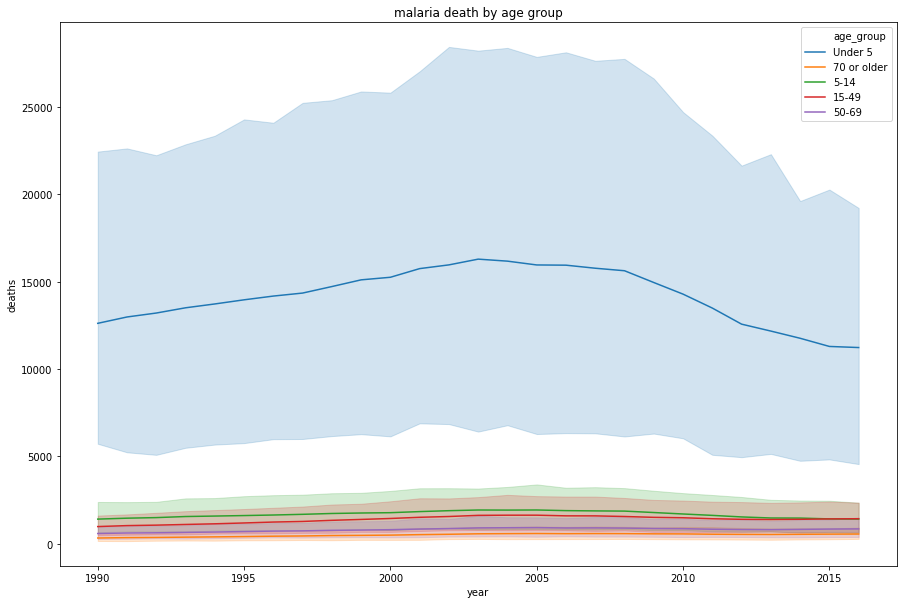

In [83]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='year',y='deaths',hue='age_group',data=malaria_death_age,ax=ax)
ax.set_title('malaria death by age group')
fig.savefig('age.png')

### 2. display death by region over the years

In [84]:
country = pd.read_csv('country_to_continent.csv')
country.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [85]:
temp = pd.merge(left=malaria_death,right=country,how='left',left_on='Code',right_on='alpha-3')
temp.head()

,Entity,Code,Year,Rate,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AFG,1990,6.802930,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Afghanistan,AFG,1991,6.973494,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
2,Afghanistan,AFG,1992,6.989882,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
3,Afghanistan,AFG,1993,7.088983,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
4,Afghanistan,AFG,1994,7.392472,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN


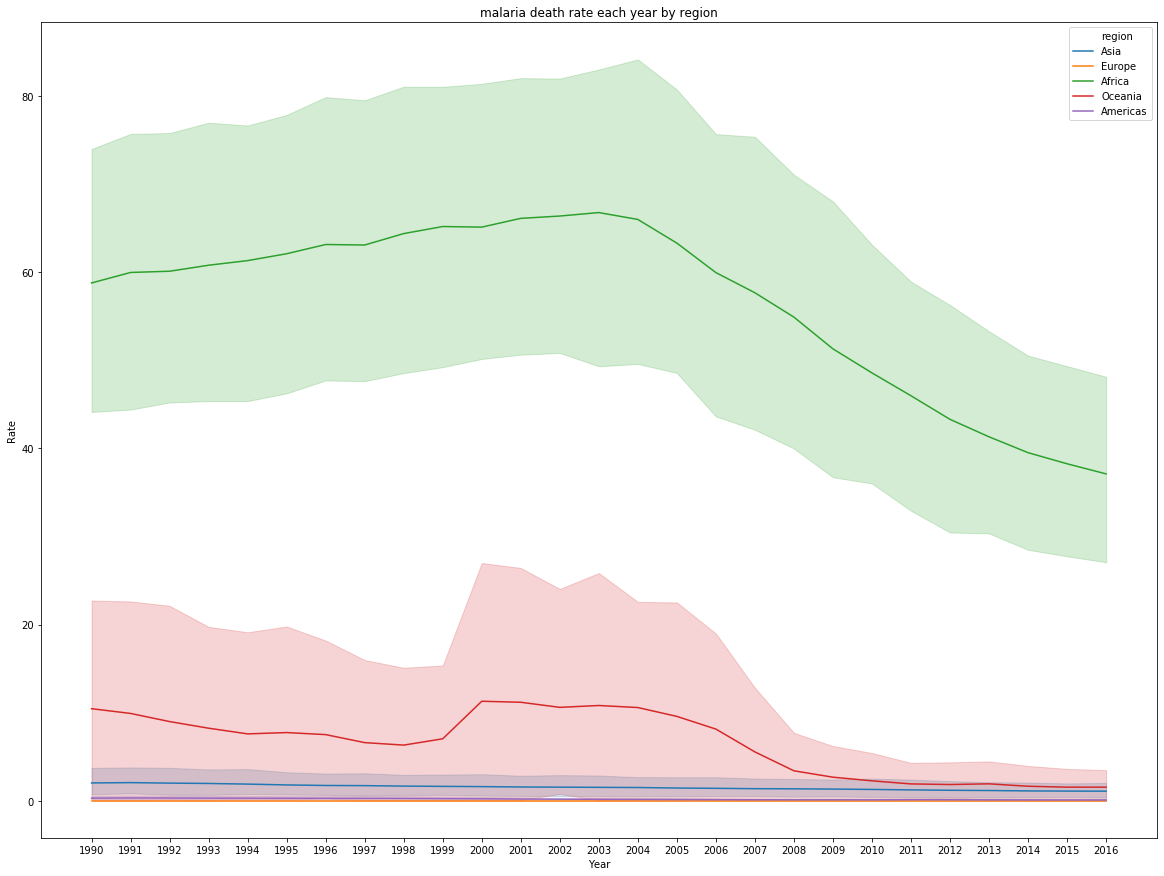

In [86]:
fig,ax = plt.subplots(figsize=(20,15))
sns.lineplot(x='Year',y='Rate',hue='region',data=temp,ax=ax)
ax.set_title('malaria death rate each year by region')
fig.savefig('region.png')

### 3.since sierra leone has the highest death rate, we would like to predict the death rate in sierra

In [87]:
idx = malaria_death[['Entity','Year','Rate']].groupby(['Year'])['Rate'].transform(max) == malaria_death['Rate']
malaria_death[idx].sort_values('Year')

,Entity,Code,Year,Rate
5671,Uganda,UGA,1990,202.993349
5672,Uganda,UGA,1991,205.391713
5673,Uganda,UGA,1992,201.330893
5674,Uganda,UGA,1993,200.555566
5675,Uganda,UGA,1994,198.295668
5676,Uganda,UGA,1995,195.041205
5677,Uganda,UGA,1996,192.120695
4760,Sierra Leone,SLE,1997,190.215616
4761,Sierra Leone,SLE,1998,197.601205
4762,Sierra Leone,SLE,1999,204.270436


In [88]:
df = malaria_death[malaria_death['Entity'] == 'Burkina Faso'][['Year','Rate']]
df.Year=pd.to_datetime(df.Year,format='%Y')
df.Rate = df.Rate.astype('float')

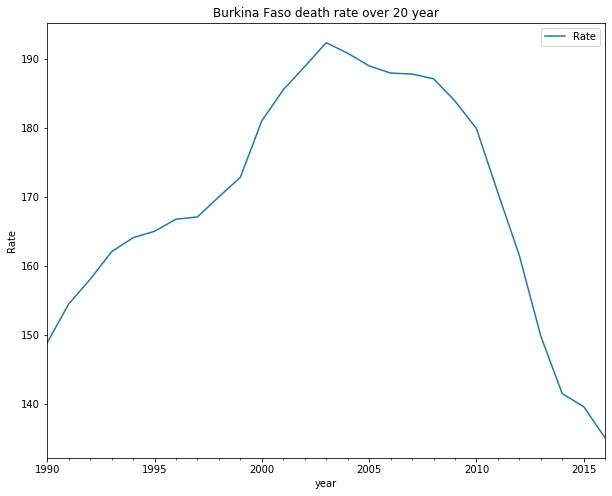

In [89]:
fig,ax = plt.subplots(figsize=(10,8))
df.plot.line(x='Year',y='Rate',ax=ax)
ax.set_xlabel('year')
ax.set_ylabel('Rate')
ax.set_title('Burkina Faso death rate over 20 year')
fig.savefig('Burkina_Faso_death')

In [91]:
df.index = df.Year
df = df.drop('Year',axis=1)

AttributeError: 'DataFrame' object has no attribute 'Year'

perform dicky fuller test: 
Test Statistic                 -3.116724
p-value                         0.025340
#Lags Used                      8.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


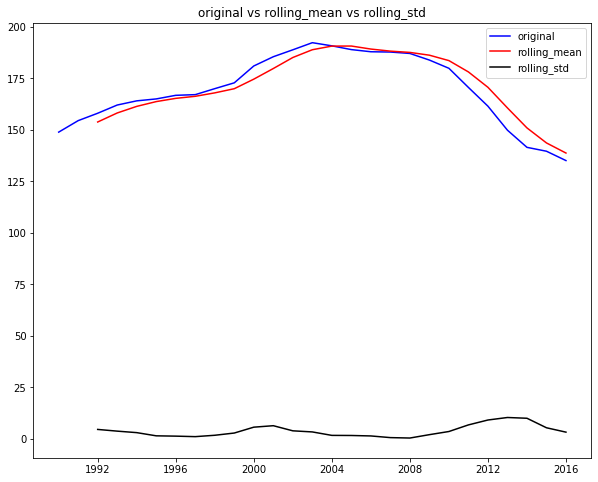

In [92]:
def test_stationarity(timeseries):
    '''plot the rolling mean vs rolling standard deviation vs original timseries
        test stationarity of a timeseries with dicky fuller test

    Parameters
    ----------
    timesereis: pandas.Series
    
    returns
    -------
    None
    
    ''' 
    #determine rolling statistics, make sure the time series is not white noise 
    rolmean = timeseries.rolling(3).mean()
    rolstd = timeseries.rolling(3).std()
    #plot rolling statistics
    fig , ax = plt.subplots(figsize = (10,8))
    original = ax.plot(timeseries,color='blue',label='original')
    mean = ax.plot(rolmean,color='red',label='rolling_mean')
    std = ax.plot(rolstd,color='black',label='rolling_std')
    ax.legend(loc='best')
    ax.set_title('original vs rolling_mean vs rolling_std')
    plt.savefig('original_vs_rolling_mean_vs_rolling_std')
    
    #perform dicky-fuller test:
    print("perform dicky fuller test: ")
    dftest = adfuller(timeseries,autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df)


In [93]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

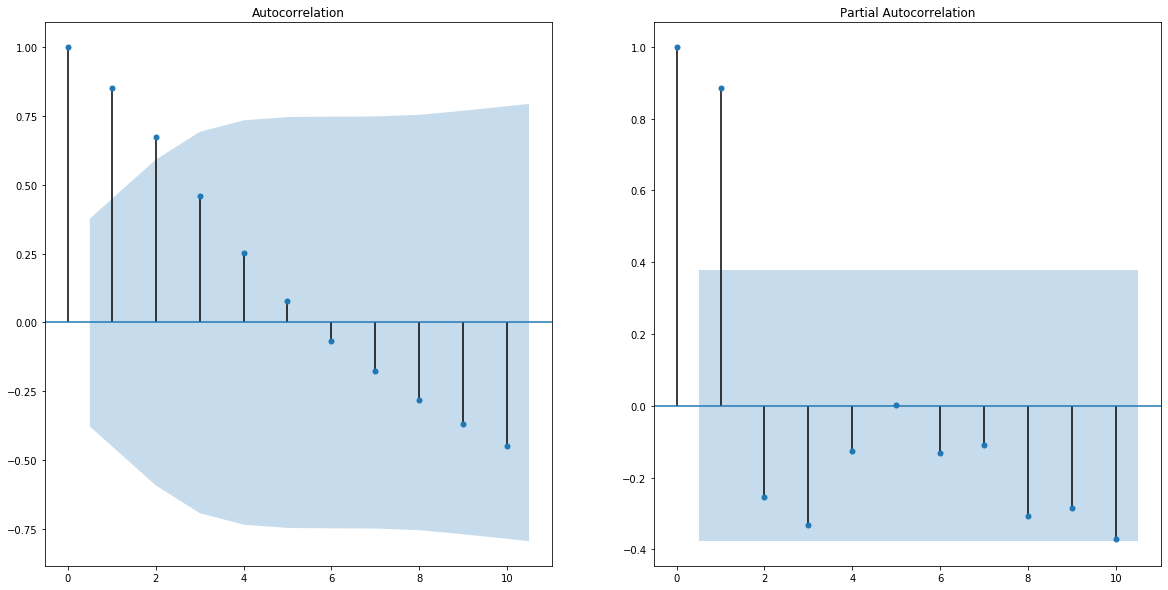

In [94]:
fig, axes = plt.subplots(1,2,figsize=(20,10))
plot_acf(df.values,lags =10,ax=axes[0])
plot_pacf(df.values,lags=10,ax=axes[1])
plt.show()

In [95]:
from statsmodels.tsa.arima_model import ARIMA

In [96]:
from pmdarima.arima.utils import ndiffs
y = df.values
ndiffs(y, test='adf')

2

/Users/jinq/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/jinq/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D2.Rate   No. Observations:                   25
Model:                 ARIMA(2, 2, 2)   Log Likelihood                 -58.633
Method:                       css-mle   S.D. of innovations              2.338
Date:                Tue, 22 Sep 2020   AIC                            129.267
Time:                        23:50:33   BIC                            136.580
Sample:                    01-01-1992   HQIC                           131.295
                         - 01-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3226      0.652     -0.495      0.621      -1.601       0.956
ar.L1.D2.Rate     0.2497      0.291      0.859      0.390      -0.320       0.819
ar.L2.D2.Rate    -0.3617      0.281     

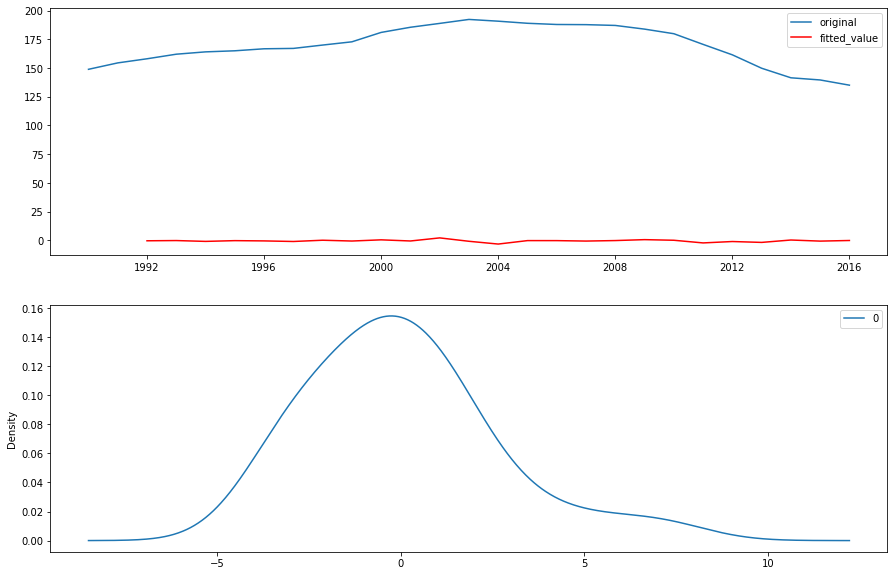

In [97]:
model = ARIMA(df['Rate'],order=(2,2,2))
ARIMA = model.fit(disp=0)
print(ARIMA.summary())
fig, axes = plt.subplots(2,1,figsize=(15,10))
axes[0].plot(df,label='original')
axes[0].plot(ARIMA.fittedvalues, color='red',label='fitted_value')
axes[0].legend()
residuals = pd.DataFrame(ARIMA.resid)
residuals.plot(kind='kde',ax=axes[1])

In [62]:
import datetime
year = '2021'
format = '%Y'
year_string = datetime.datetime.strptime(year,format)
year_string
prediction,_,_ = ARIMA.forecast(steps=5)

In [63]:
import datetime
predict_series = {}
prediction,_,_ = ARIMA.forecast(steps=5)
for i in range(2017,2021):
    predict_series[datetime.datetime.strptime(str(i),'%Y')] = prediction[i-2017]

predict_df = pd.DataFrame(predict_series.items(),columns=['Year','Rate'])
predict_df
predict_df.index = predict_df.Year
predict_df.drop('Year',axis=1,inplace=True)

Text(0.5, 1.0, 'Burkina Faso death rate prediction vs original')

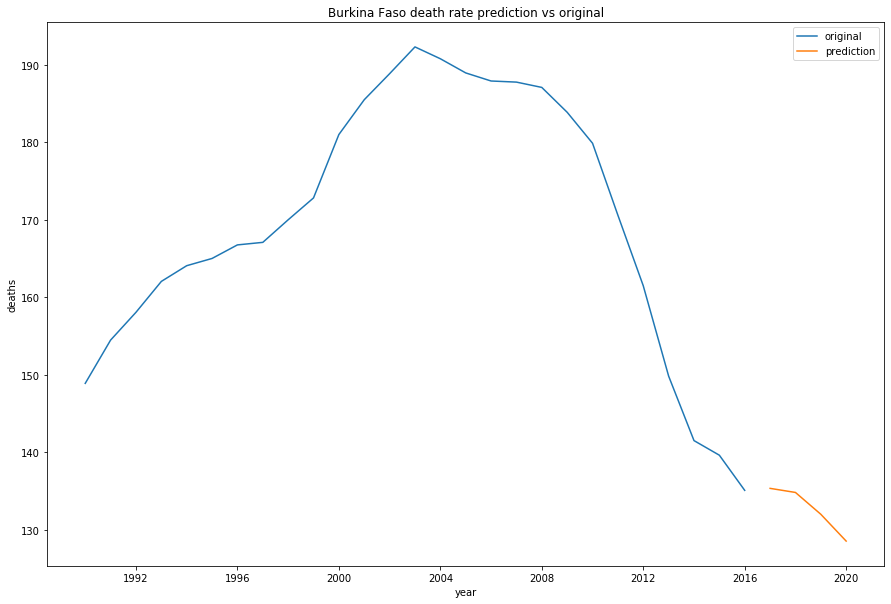

In [65]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df,label='original')
ax.plot(predict_df,label='prediction')
ax.set_xlabel('year')
ax.set_ylabel('deaths')
ax.legend()
ax.set_title('Burkina Faso death rate prediction vs original')